<a href="https://colab.research.google.com/github/shy-tan/final-year-project/blob/main/LSTM_ver_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

np.random.seed(1)

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('prepared_dataset.csv')

## Exploring the dataset

In [3]:
df.shape

(5012, 10)

In [4]:
df.head()

,Unnamed: 0,Car1,Car2,Car3,Car4,Car5,Car6,Car7,Car8,Car9
0,0,77.0,52.0,51.0,51.0,34.0,26.0,29.0,31.0,23.0
1,1,77.0,52.0,52.0,44.0,32.0,26.0,28.0,32.0,21.0
2,2,77.0,53.0,49.0,44.0,34.0,27.0,28.0,31.0,22.0
3,3,77.0,52.0,49.0,53.0,36.0,31.0,24.0,30.0,22.0
4,4,77.0,52.0,49.0,45.0,37.0,32.0,26.0,30.0,21.0


In [5]:
df.head()

,Unnamed: 0,Car1,Car2,Car3,Car4,Car5,Car6,Car7,Car8,Car9
0,0,77.0,52.0,51.0,51.0,34.0,26.0,29.0,31.0,23.0
1,1,77.0,52.0,52.0,44.0,32.0,26.0,28.0,32.0,21.0
2,2,77.0,53.0,49.0,44.0,34.0,27.0,28.0,31.0,22.0
3,3,77.0,52.0,49.0,53.0,36.0,31.0,24.0,30.0,22.0
4,4,77.0,52.0,49.0,45.0,37.0,32.0,26.0,30.0,21.0


In [6]:
df.describe()

,Unnamed: 0,Car1,Car2,Car3,Car4,Car5,Car6,Car7,Car8,Car9
count,5012.000000,5012.000000,5012.000000,5012.000000,5012.00000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000
mean,2505.500000,75.943724,52.202754,49.121732,42.10038,33.067452,31.937937,29.929555,26.673119,21.401317
std,1446.984105,1.489009,1.687287,2.071065,2.48108,2.927624,3.314419,4.362906,2.778333,2.500128
min,0.000000,67.000000,45.000000,40.000000,31.00000,15.000000,11.000000,12.000000,11.000000,7.000000
25%,1252.750000,75.000000,51.000000,48.000000,40.00000,31.000000,30.000000,28.000000,25.000000,20.000000
50%,2505.500000,76.000000,52.000000,49.000000,42.00000,33.000000,32.000000,30.000000,27.000000,21.000000
75%,3758.250000,77.000000,54.000000,51.000000,44.00000,35.000000,34.000000,33.000000,29.000000,23.000000
max,5011.000000,80.000000,56.000000,54.000000,54.00000,43.000000,44.000000,48.000000,40.000000,30.000000


In [7]:
df.count()

Unnamed: 0    5012
Car1          5012
Car2          5012
Car3          5012
Car4          5012
Car5          5012
Car6          5012
Car7          5012
Car8          5012
Car9          5012
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.head()

,Car1,Car2,Car3,Car4,Car5,Car6,Car7,Car8,Car9
0,77.0,52.0,51.0,51.0,34.0,26.0,29.0,31.0,23.0
1,77.0,52.0,52.0,44.0,32.0,26.0,28.0,32.0,21.0
2,77.0,53.0,49.0,44.0,34.0,27.0,28.0,31.0,22.0
3,77.0,52.0,49.0,53.0,36.0,31.0,24.0,30.0,22.0
4,77.0,52.0,49.0,45.0,37.0,32.0,26.0,30.0,21.0


In [10]:
df['Car1'].unique()

array([77.        , 73.        , 74.        , 75.        , 76.        ,
       78.        , 72.        , 69.        , 71.        , 70.        ,
       67.        , 79.        , 80.        , 75.94491018])

## Visualizing the dataset

In [11]:
cols = df.columns

In [12]:
cols = list(cols)

In [13]:
cols

['Car1', 'Car2', 'Car3', 'Car4', 'Car5', 'Car6', 'Car7', 'Car8', 'Car9']

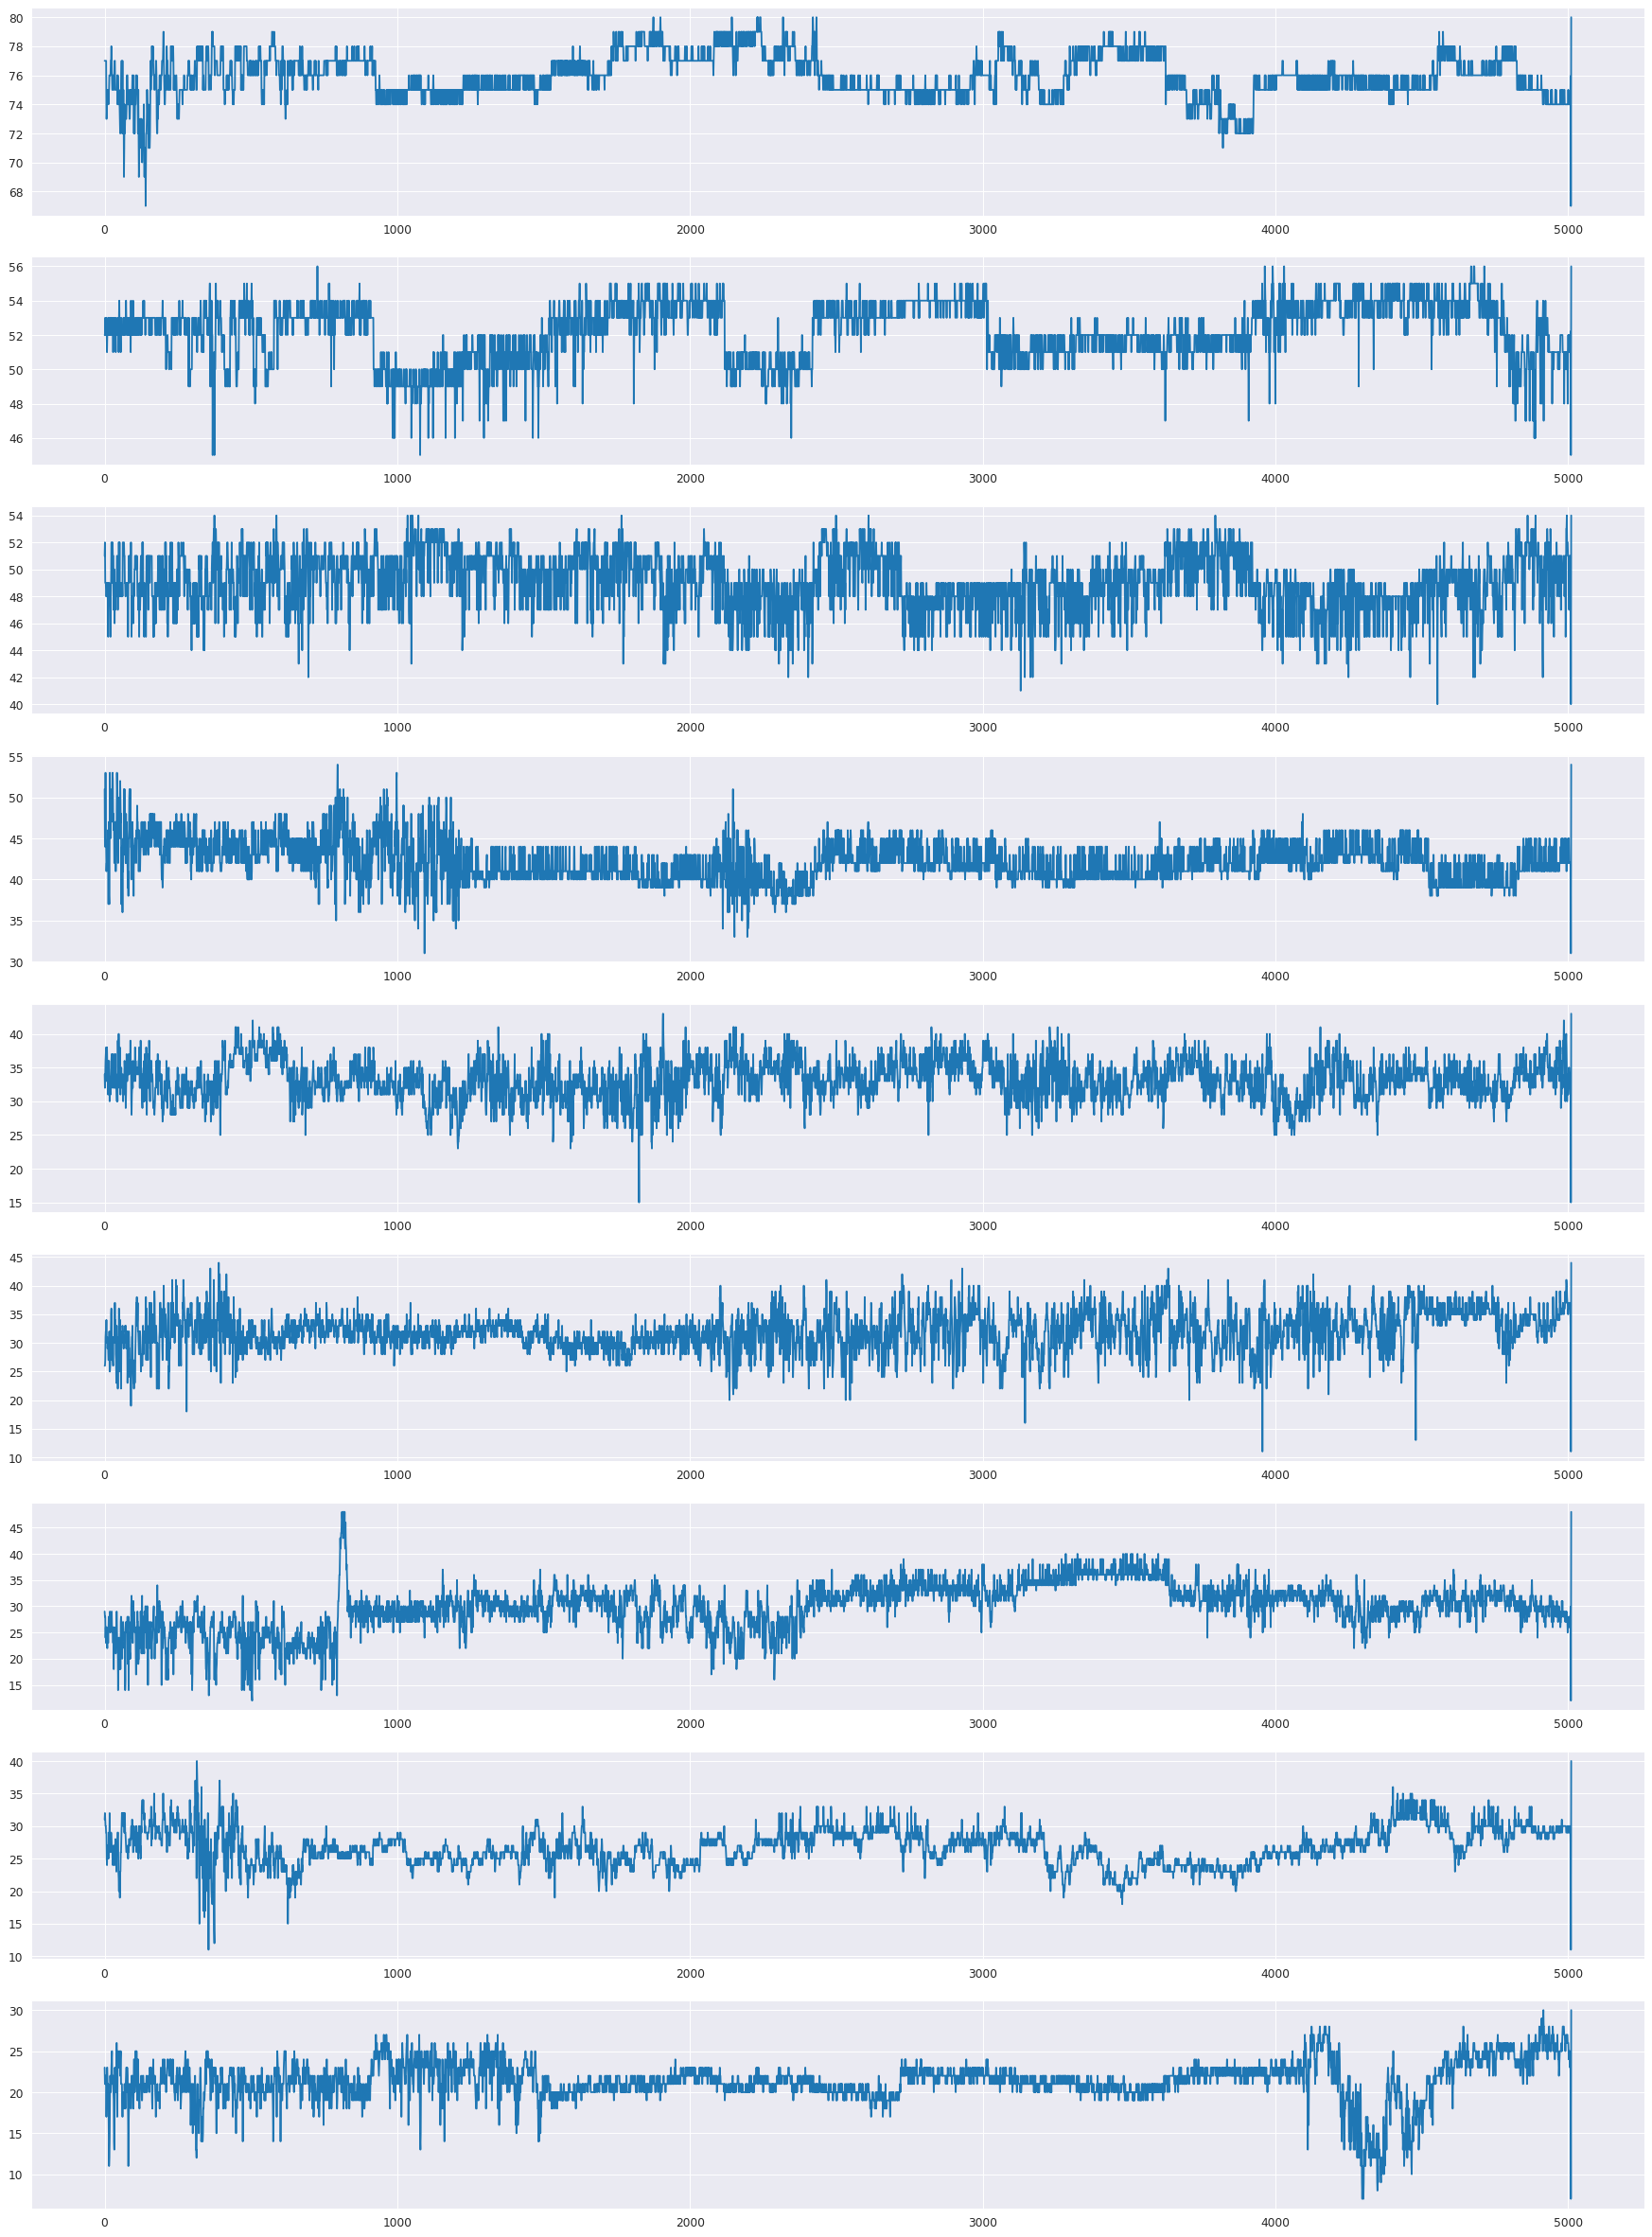

In [14]:
values = df.to_numpy()
i = 1

plt.figure(figsize=(25, 35), dpi=88)
for col in cols:
  plt.subplot(len(cols), 1, i)
  plt.plot(values[:, cols.index(col)])
  i+=1

plt.show()

In [15]:
values

array([[77.        , 52.        , 51.        , ..., 29.        ,
        31.        , 23.        ],
       [77.        , 52.        , 52.        , ..., 28.        ,
        32.        , 21.        ],
       [77.        , 53.        , 49.        , ..., 28.        ,
        31.        , 22.        ],
       ...,
       [75.94491018, 52.20339321, 49.12315369, ..., 29.92914172,
        26.6744511 , 21.40259481],
       [67.        , 45.        , 40.        , ..., 12.        ,
        11.        ,  7.        ],
       [80.        , 56.        , 54.        , ..., 48.        ,
        40.        , 30.        ]])

In [16]:
values[:]

array([[77.        , 52.        , 51.        , ..., 29.        ,
        31.        , 23.        ],
       [77.        , 52.        , 52.        , ..., 28.        ,
        32.        , 21.        ],
       [77.        , 53.        , 49.        , ..., 28.        ,
        31.        , 22.        ],
       ...,
       [75.94491018, 52.20339321, 49.12315369, ..., 29.92914172,
        26.6744511 , 21.40259481],
       [67.        , 45.        , 40.        , ..., 12.        ,
        11.        ,  7.        ],
       [80.        , 56.        , 54.        , ..., 48.        ,
        40.        , 30.        ]])

In [17]:
values.shape

(5012, 9)

## Preparing data for LSTM


### Train Test Split

In [18]:
df.shape

(5012, 9)

In [19]:
0.9*5012

4510.8

In [20]:
train_dataset = df.iloc[:4510]
test_dataset = df.iloc[4510:]

In [21]:
train_dataset.shape

(4510, 9)

In [22]:
test_dataset.shape

(502, 9)

### Normalize the newly generated datasets

In [23]:
from sklearn.preprocessing import RobustScaler

f_transformer = RobustScaler()

f_transformer = f_transformer.fit(train_dataset.to_numpy())

normalized_train_dataset = f_transformer.transform(train_dataset.to_numpy())
normalized_test_dataset = f_transformer.transform(test_dataset.to_numpy())

In [24]:
normalized_train_dataset.shape

(4510, 9)

In [25]:
normalized_test_dataset.shape

(502, 9)

In [26]:
def create_dataset(data, steps):
  features, labels = [], []
  for i in range(len(data)-steps):
    data_seq = data[i: i+steps, :]
    features.append(data_seq)

    seq_label = data[i+steps, :]
    labels.append(seq_label)

  return np.array(features), np.array(labels)

In [27]:
TIME_STEPS = 15

train_features, train_labels = create_dataset(normalized_train_dataset, TIME_STEPS)
test_features, test_labels = create_dataset(normalized_test_dataset, TIME_STEPS)

In [28]:
print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

(4495, 15, 9) (4495, 9)
(487, 15, 9) (487, 9)


## Data should be in the shape of [samples, timesteps, n_features]

## LSTM Model

In [54]:
model = keras.models.Sequential()
model.add(
    keras.layers.LSTM(
          50, 
          input_shape=(train_features.shape[1], train_features.shape[2])
        )
    )
model.add(keras.layers.Dense(9))

model.compile(optimizer='adam', loss='mse')

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                12000     
                                                                 
 dense_5 (Dense)             (None, 9)                 459       
                                                                 
Total params: 12,459
Trainable params: 12,459
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(train_features, train_labels, batch_size=64, epochs=50, shuffle=False, validation_split=0.1)

Epoch 1/50
64/64 [==============================] - 3s 16ms/step - loss: 0.6254 - val_loss: 0.8788
Epoch 2/50
64/64 [==============================] - 0s 7ms/step - loss: 0.4227 - val_loss: 0.7137
Epoch 3/50
64/64 [==============================] - 0s 8ms/step - loss: 0.3498 - val_loss: 0.6405
Epoch 4/50
64/64 [==============================] - 0s 7ms/step - loss: 0.3226 - val_loss: 0.5939
Epoch 5/50
64/64 [==============================] - 0s 7ms/step - loss: 0.3090 - val_loss: 0.5602
Epoch 6/50
64/64 [==============================] - 1s 8ms/step - loss: 0.3004 - val_loss: 0.5307
Epoch 7/50
64/64 [==============================] - 1s 8ms/step - loss: 0.2943 - val_loss: 0.5087
Epoch 8/50
64/64 [==============================] - 0s 7ms/step - loss: 0.2898 - val_loss: 0.4927
Epoch 9/50
64/64 [==============================] - 0s 7ms/step - loss: 0.2860 - val_loss: 0.4808
Epoch 10/50
64/64 [==============================] - 0s 7ms/step - loss: 0.2828 - val_loss: 0.4710
Epoch 11/50
64/64 

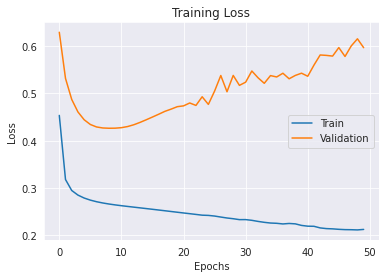

In [53]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [33]:
predictions = model.predict(test_features)

In [34]:
predictions.shape

(487, 9)

In [35]:
test_labels.shape

(487, 9)

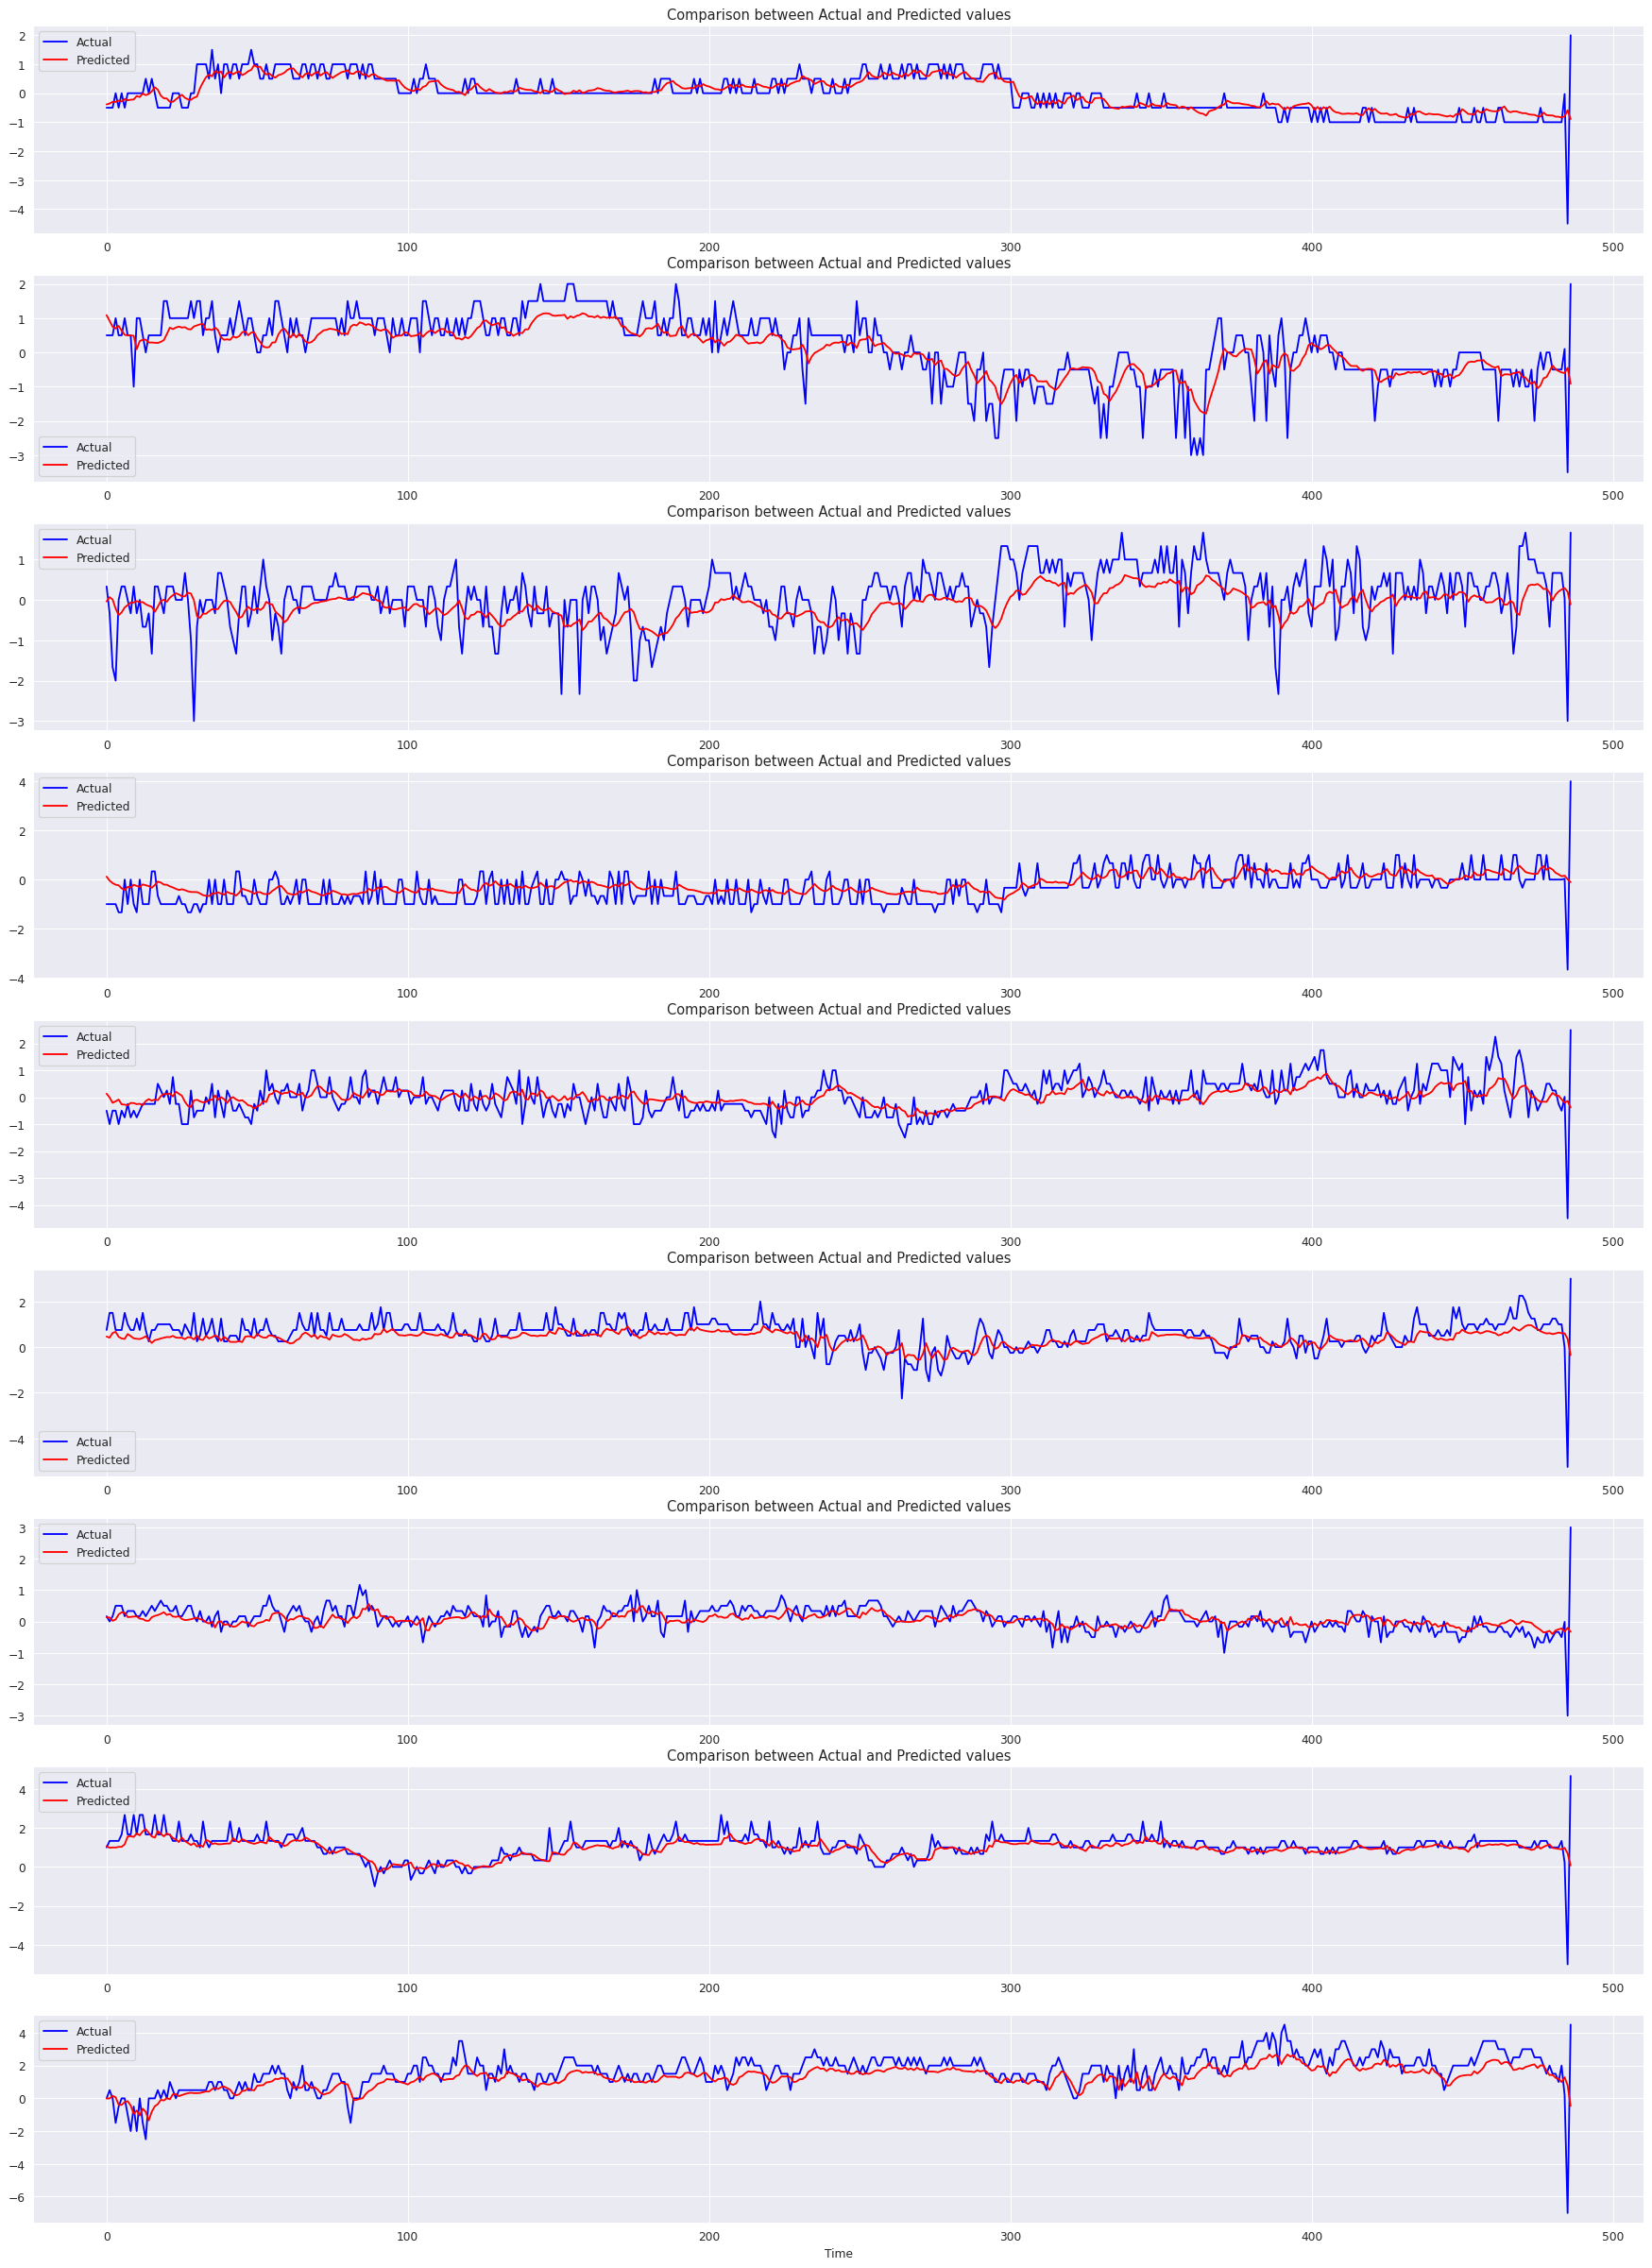

In [36]:
i = 1

plt.figure(figsize=(25, 35), dpi=88)

for col in cols:
  plt.title('Comparison between Actual and Predicted values')

  plt.subplot(len(cols), 1, i)
  plt.plot(test_labels[:, cols.index(col)], color='blue', label='Actual')
  plt.plot(predictions[:, cols.index(col)], color='red', label='Predicted')
  plt.legend()
  i+=1

plt.xlabel('Time')
plt.show()